In [2]:
##importing the necessary libraries
import pandas as pd
import numpy as np

In [3]:
##Import the train and test datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

### Creating a new dataset

In [4]:
train_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
##Creating a new dataset based on the existing dataset
new_train_df = train_df[['Id', 'LotArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'SalePrice']]
new_train_df.head()

,Id,LotArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,SalePrice
0,1,8450,1,0,2,1,3,208500
1,2,9600,0,1,2,0,3,181500
2,3,11250,1,0,2,1,3,223500
3,4,9550,1,0,1,0,3,140000
4,5,14260,1,0,2,1,4,250000


In [8]:
new_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Id            1460 non-null   int64
 1   LotArea       1460 non-null   int64
 2   BsmtFullBath  1460 non-null   int64
 3   BsmtHalfBath  1460 non-null   int64
 4   FullBath      1460 non-null   int64
 5   HalfBath      1460 non-null   int64
 6   BedroomAbvGr  1460 non-null   int64
 7   SalePrice     1460 non-null   int64
dtypes: int64(8)
memory usage: 91.4 KB


### Visualizing the dataset

In [9]:
##importing the necessary visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
##Checking the correlation of features with the target variable
new_corr = new_train_df.corr()

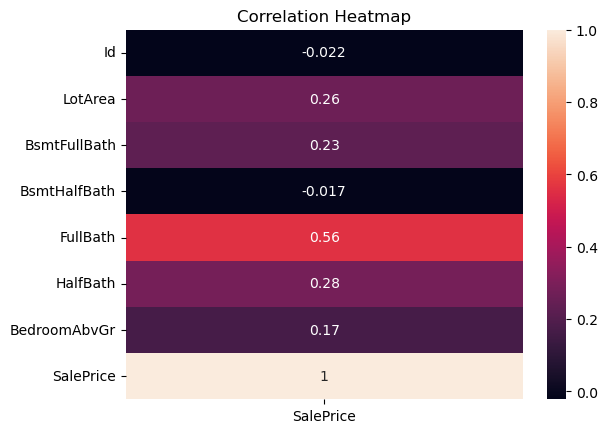

In [11]:
##Creating a heatmap
plt.figure()
sns.heatmap(new_corr[['SalePrice']], annot=True)
plt.title("Correlation with Sale Price Heatmap")
plt.show()

### Model Training(Linear Regression)

In [27]:
##importing the necessary regression libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

We can remove the 'Id' and 'BsmtHalfBath' features because they are low in correlation to sale price

In [26]:
##Feature Selection
X = new_train_df[['LotArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr']]
y = new_train_df[['SalePrice']]

In [29]:
##Applying train test split on train.csv
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [30]:
##Applying Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [31]:
##Displaying the regression coefficients
print(lr_model.coef_)

[[ 1.18178643e+00  3.51926937e+04  5.62017522e+03  7.71356989e+04
   3.51570817e+04 -6.81794994e+03]]


In [32]:
##Displaying the value of intercept
print(lr_model.intercept_)

[38146.05044817]


### Evaluating the model(Linear Regression)

In [33]:
##Prediction
y_pred = lr_model.predict(X_test)
y_pred

array([[110391.62574144],
       [256797.34819067],
       [112234.65585625],
       [177872.53052456],
       [229216.92336127],
       [145418.53661313],
       [154111.93188007],
       [209815.15309532],
       [145944.43157477],
       [149444.2765226 ],
       [185019.57381354],
       [141670.64378989],
       [122918.00518934],
       [183983.54815746],
       [216649.42402378],
       [147383.62342148],
       [216863.32736773],
       [109918.35445217],
       [111410.95071409],
       [219760.04431737],
       [222667.23893677],
       [217756.7579093 ],
       [252515.73595242],
       [143773.26587584],
       [217812.46027966],
       [188108.20682626],
       [182480.31581767],
       [124262.87814743],
       [219930.06315527],
       [183780.50491721],
       [103618.02696455],
       [254869.85452227],
       [270406.9065939 ],
       [111661.48943739],
       [223111.5906347 ],
       [140893.02831852],
       [173686.53711935],
       [209993.37882053],
       [2458

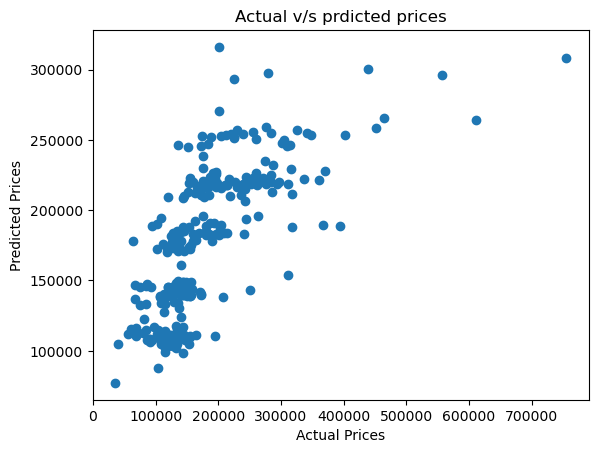

In [34]:
##Plotting the y_pred vs y_test
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual v/s prdicted prices")
plt.show()

<Axes: xlabel='SalePrice'>

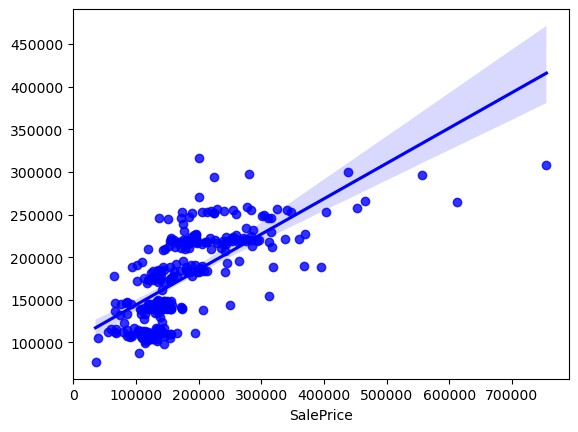

In [36]:
sns.regplot(x=y_test, y=y_pred, color = 'blue')

In [37]:
##Calculating the r2-score for the model
from sklearn.metrics import r2_score
R2_value = r2_score(y_test, y_pred)
print(R2_value)

0.47923378316092125


0.4749 depicts that the accuracy of our regression model is 47.49% in reality i.e. our model explains 47.49 % of variability in our data.